<a href="https://colab.research.google.com/github/DrPaulaEkene/Uterine-Myoma-Uterine-fibroids-Ultrasound_image-classification/blob/main/80_20_Uterine_Myoma_(Uterine_fibroids)_Ultrasound_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook focuses on the Comparative Analysis of Deep Learning Architectures for Uterine Myoma Classification: ResNet101 vs. ResNet101 plus DCGAN**

*Import all needed libraries*

In [ ]:
# Make all necessary imports
import tensorflow as tf
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Concatenate, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
# Import the drive module
from google.colab import drive

# Mount the Google Drive to the Colab environment.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Exploratory data analysis

In [ ]:
# Create the data file paths/directories
# Define the base directory
data_directory = "/content/drive/MyDrive/UF_dataset"

# Define directories for training and testing data
train_directory = "/content/drive/MyDrive/UF_dataset/train"
test_directory = "/content/drive/MyDrive/UF_dataset/test"

In [ ]:
# Print the contents of the base directory

# Function to print contents of a directory
def print_directory_contents(directory, subdirs):
    for subdir in subdirs:
        subdir_path = os.path.join(directory, subdir)
        if os.path.exists(subdir_path):
            print(f"\nContents of {subdir_path}:")
            for item in os.listdir(subdir_path):
                print(item)
        else:
            print(f"\n{subdir_path} does not exist.")

print("Contents of the base directory:")
print(os.listdir(data_directory))

# Print the contents of the training directory
print("\nContents of the training directory:")
print(os.listdir(train_directory))
print_directory_contents(train_directory, ['NUF', 'UF'])

# Print the contents of the testing directory
print("\nContents of the testing directory:")
print(os.listdir(test_directory))
print_directory_contents(test_directory, ['NUF', 'UF'])

Contents of the base directory:
['1.2.826.0.1.3680043.2.461.11301520.1540965563.jpg', '1.2.826.0.1.3680043.2.461.11301518.1849713856.jpg', '1.2.826.0.1.3680043.2.461.11301519.531737451.jpg', '1.2.826.0.1.3680043.2.461.11301521.1331253811.jpg', '1.2.826.0.1.3680043.2.461.11301521.250905338.jpg', '1.2.826.0.1.3680043.2.461.11301521.704960520.jpg', '1.2.826.0.1.3680043.2.461.11301521.1865503937.jpg', '1.2.826.0.1.3680043.2.461.11301521.4216844312.jpg', '1.2.826.0.1.3680043.2.461.11301522.742552078.jpg', '1.2.826.0.1.3680043.2.461.11301522.2857734559.jpg', '1.2.826.0.1.3680043.2.461.11301522.1372347287.jpg', '1.2.826.0.1.3680043.2.461.11301521.2436177613.jpg', '1.2.826.0.1.3680043.2.461.11301520.2658168329.jpg', '1.2.826.0.1.3680043.2.461.11301522.913479745.jpg', '1.2.826.0.1.3680043.2.461.11301525.2220413095.jpg', '1.2.826.0.1.3680043.2.461.11301523.1653786924.jpg', '1.2.826.0.1.3680043.2.461.11301523.2948715458.jpg', '1.2.826.0.1.3680043.2.461.11301524.2960341954.jpg', '1.2.826.0.1.36800

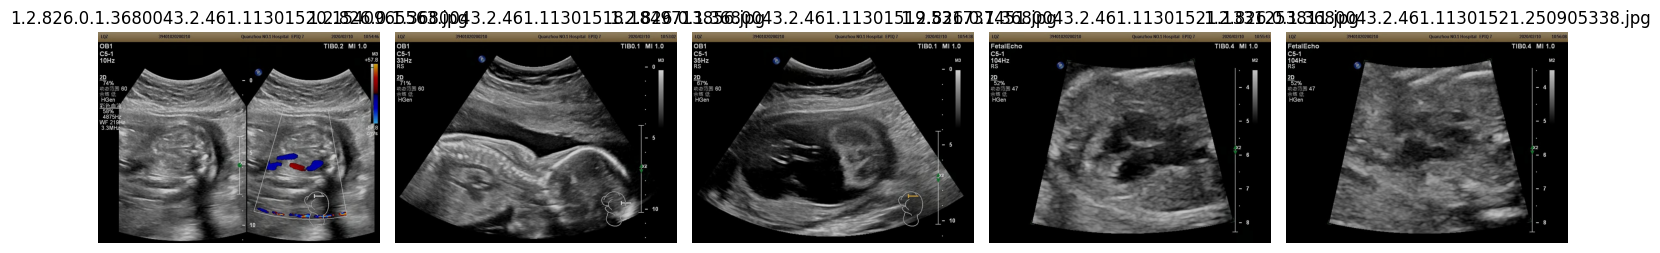

In [ ]:
# Plot 5 images from each directory
import os
import matplotlib.pyplot as plt
from PIL import Image


def plot_images(directory):
    # Get the list of files in the directory
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))] # Filter out directories

    # Plot up to 5 images from the directory
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    axes = axes.flatten()

    for i, file in enumerate(files[:5]):
        # Load the image
        img_path = os.path.join(directory, file)
        img = Image.open(img_path)

        # Plot the image
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(file)

    plt.tight_layout()
    plt.show()

# Plot 5 images from the data directory
plot_images(data_directory)

In [ ]:
from collections import defaultdict
import numpy as np

def get_image_shapes(directory):
    shapes = defaultdict(int)
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                with Image.open(img_path) as img:
                    shapes[img.size] += 1
    return shapes

train_shapes = get_image_shapes(train_directory)
test_shapes = get_image_shapes(test_directory)

print("Training set image shapes:", dict(train_shapes))
print("Testing set image shapes:", dict(test_shapes))


Training set image shapes: {(1024, 768): 1390, (1138, 846): 61, (1028, 796): 104, (1026, 766): 2, (1020, 772): 15, (768, 576): 11, (1022, 786): 1, (994, 766): 1, (720, 576): 4, (1920, 1080): 1, (1136, 852): 3, (704, 666): 1, (730, 666): 1, (1160, 844): 1, (1280, 872): 3, (1034, 794): 5}
Testing set image shapes: {(1024, 768): 370, (720, 576): 2, (768, 552): 1, (1020, 772): 1, (804, 632): 1, (1028, 796): 6, (1138, 846): 15}


Feature Visualization

Training Set t-SNE Feature Visualization:


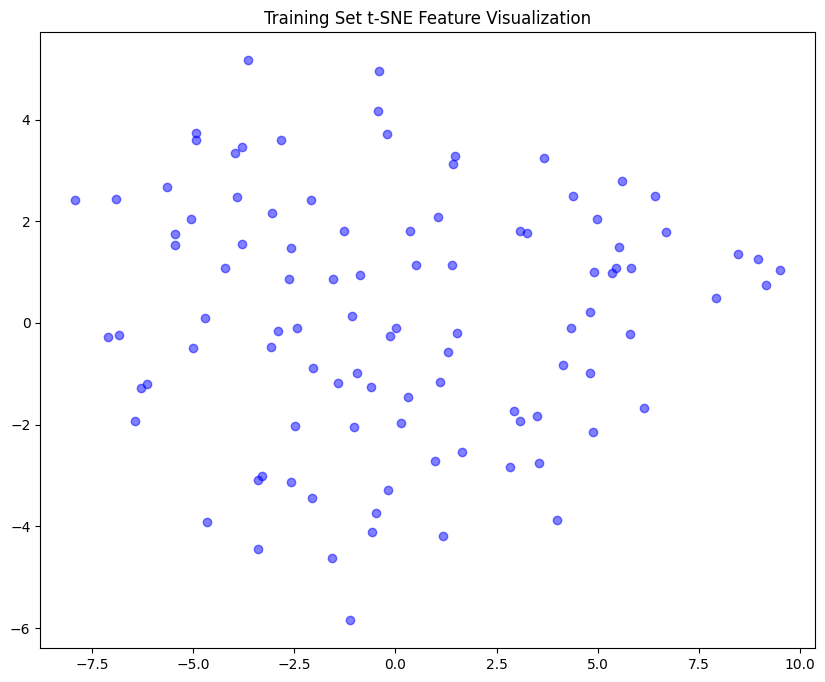

Testing Set t-SNE Feature Visualization:


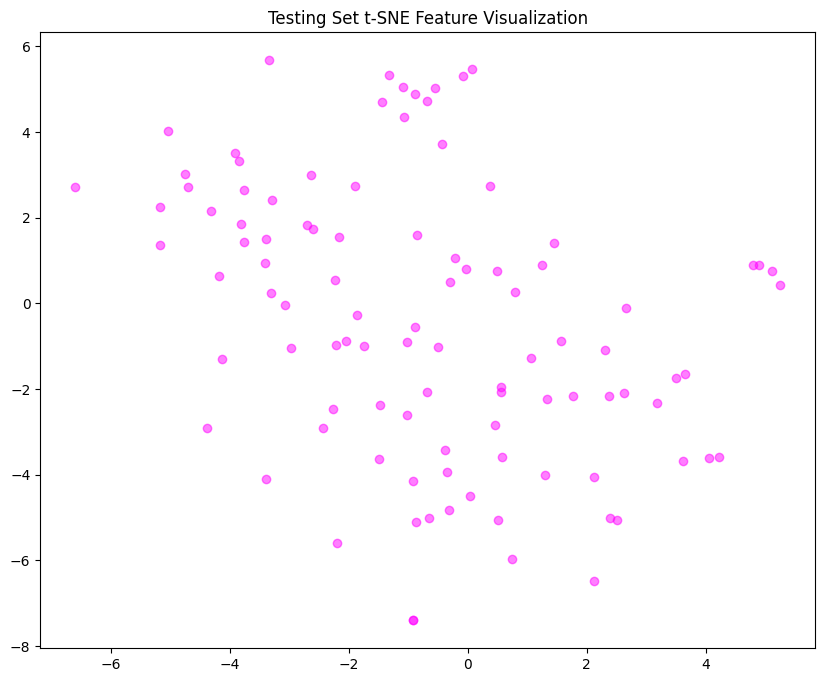

In [34]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def extract_features(directory, num_images=100):
    features = []
    for subdir, _, files in os.walk(directory):
        for file in files[:num_images]:
            if file.endswith(('jpg', 'png', 'jpeg')):
                image_path = os.path.join(subdir, file)
                with Image.open(image_path) as img:
                    img_resized = img.resize((128, 128))
                    features.append(np.array(img_resized).flatten())
    return np.array(features)

def plot_tsne_features(features, title, color='blue'):
    plt.figure(figsize=(10, 8))
    tsne = TSNE(n_components=2, random_state=42)
    tsne_features = tsne.fit_transform(features)
    plt.scatter(tsne_features[:, 0], tsne_features[:, 1], alpha=0.5, c=color)
    plt.title(title)
    plt.show()

print("Training Set t-SNE Feature Visualization:")
train_features = extract_features(train_directory)
plot_tsne_features(train_features, 'Training Set t-SNE Feature Visualization')

print("Testing Set t-SNE Feature Visualization:")
test_features = extract_features(test_directory)
plot_tsne_features(test_features, 'Testing Set t-SNE Feature Visualization', color='magenta')

Preprocessing with imageDataGenerator

Image classification with ResNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
data_directory = "/content/drive/MyDrive/UF_dataset"
train_directory = "/content/drive/MyDrive/UF_dataset/train"
test_directory = "/content/drive/MyDrive/UF_dataset/test"

# Create an ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Load pre-trained ResNet50 model (without top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)

# Create model
model = tf.keras.Model(inputs=base_model.input, outputs=x)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'ResNet50 Test Accuracy: {accuracy:.2f}')


Found 1604 images belonging to 2 classes.
Found 396 images belonging to 2 classes.
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)     